# **Bank Marketing Prediction**

#### Project Type - Classification
#### Team Member - Nhu Doan, Tran Tran, Ton Huynh, Thi Chung, Tri Ngo

### **<u>Project Summary</u>**

- **Project Overview:**
  - This project focuses on utilizing machine learning techniques to predict the effectiveness of bank marketing campaigns.
  - The data used is provided by a Portuguese banking institution and includes variables like age, job, marital status, education, and balance.
  - Source: https://archive.ics.uci.edu/dataset/222/bank+marketing
  
- **Project Goals:**
  - Develop a classification model to predict the effectiveness of bank marketing campaigns.
  - Classify a client's response to a campaign as yes or no.
  
- **Data Handling and Feature Engineering:**
  - Understand data: Dataset contains 45,211 observations and 17 columns.
  - Handling Duplicate, Handling Null Values, Outliers

- **Data Analysis:**
  - Univariate, Bivariate, Multivariate.
  - Visualizations created, including distplot, count plot, bar plot, pair plot, heatmap, and boxplot.
  
- **Insights from Analysis:**
  - Majority of clients aged between 25 and 60; most term deposits from clients aged 30 to 36.
  - Clients with managerial jobs more likely to subscribe to term deposits.
  - Married clients most and least likely to subscribe to term deposits.
  - Higher education levels increase likelihood of subscribing to term deposits.
  - Clients without credit defaults more likely to subscribe.

- **Data Preprocessing:**
  - Replaced null values with their respective modes for features like contact, education, and job.
  - Features with more than 50% null values were eliminated.
  - Outliers treated using the interquartile range.

- **Feature Encoding:**
  - Label encoding used for categorical variables with few categories.
  - One-hot encoding used for job and month variables.
  - Addressed class imbalance using SMOTE.
  - MinMaxScaler used for data scaling.

- **Model Training:**
  - Models trained include Logistic Regression, Random Forest, XGBoost, and KNN. 
  - Performance improved using cross-validation and Hyperparameter Tuning.

- **Best Model: XGBoost**
  - High accuracy, precision, recall, F1 score, and ROC AUC score.
  - Features like housing, month_jun, and month_jan have higher importance.


### **<u>Problem Statement</u>**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### **<u>Data Description</u>**

- age: age of client (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

.

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loabding Dataset
df=pd.read_csv("C:\\Users\\yacin\\Downloads\\Coding\\Machine-Learning-Project-Sem-4-Classification\\bank-full.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
# First Five Observations
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
# Last five observations
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

.

## **<u>Data Inspection</u>**

In [8]:
# Checking shape of the dataset
df.shape

(45211, 17)

- Dataset having 45211 observations and 17 columns

In [9]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- In the dataset, there are object, float64, and int64 dtypes features present.

In [11]:
# Bsic description of Dataset
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [12]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [13]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                          
age                             0
day                             0
poutcome                        0
previous                        0
pdays                           0
campaign                        0
duration                        0
month                           0
contact                         0
job                             0
loan                            0
housing                         0
balance                         0
default                         0
education                       0
marital                         0
y                               0

<b><u>Observations :</u></b>
- Dataset having 45211 observations and 17 columns.
- In the dataset, there are object, float64, and int64 dtypes features present.
- Dataset having 0 duplicated values.
- There are no null/missing values in the dataset.

.

## **<u>Understanding Variables</u>**

In [14]:
# Basic description of Dataset
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [15]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [16]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [17]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------------------------------

<b><u>Observations :</u><b>
- job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables in this dataset.
- There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
- The unknown values for features job, education, contact, and poutcome are 288; 1857; 13020; and 36959, respectively. Unknown values can be treated as null since they are not defined and can be taken out of features by treatment.

.

## **<u>Data Wrangling and Feature Engineering</u>**

#### ***[1] <u> Handling Duplicate Values</u>***

In [18]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


.

#### ***[2] <u> Handling Null / Missing Values</u>***

In [19]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [20]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                  
poutcome                    36959                   81.75
contact                     13020                   28.80
education                    1857                    4.11
job                           288                    0.64
month                           0                    0.00
previous                        0                    0.00
pdays                           0                    0.00
campaign                        0                    0.00
duration                        0                    0.00
age                             0                    0.00
day                             0                    0.00
loan                            0                    0.00
housing                         0                    0.00
balance                         0                    0.00
default                         0                    0.00
marital                         0                    0.00
y                               0                    0.00

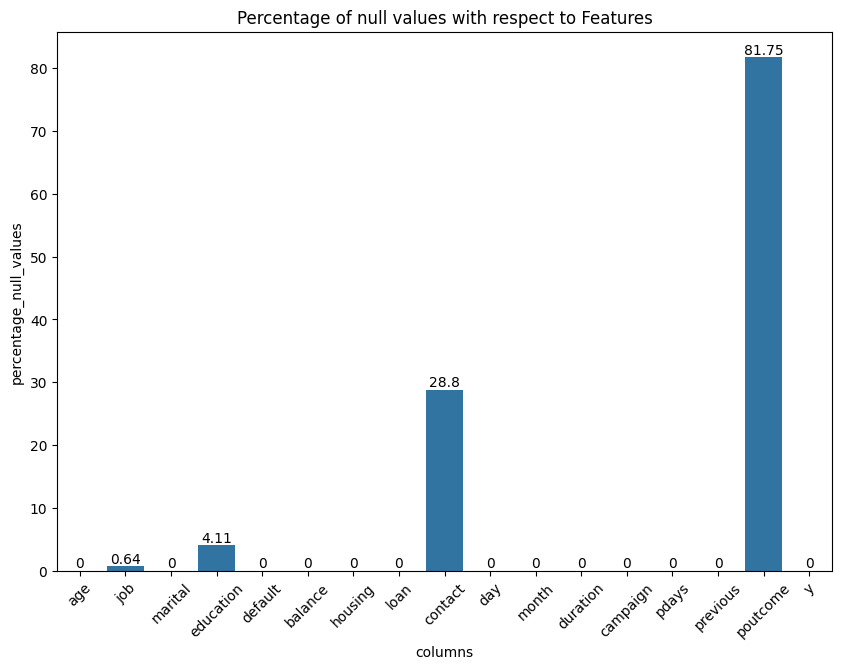

In [21]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

- The null values for poutcome, contact, education, and job are 81.75%, 28.80%, 4.11%, and 0.64%, respectively. 

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

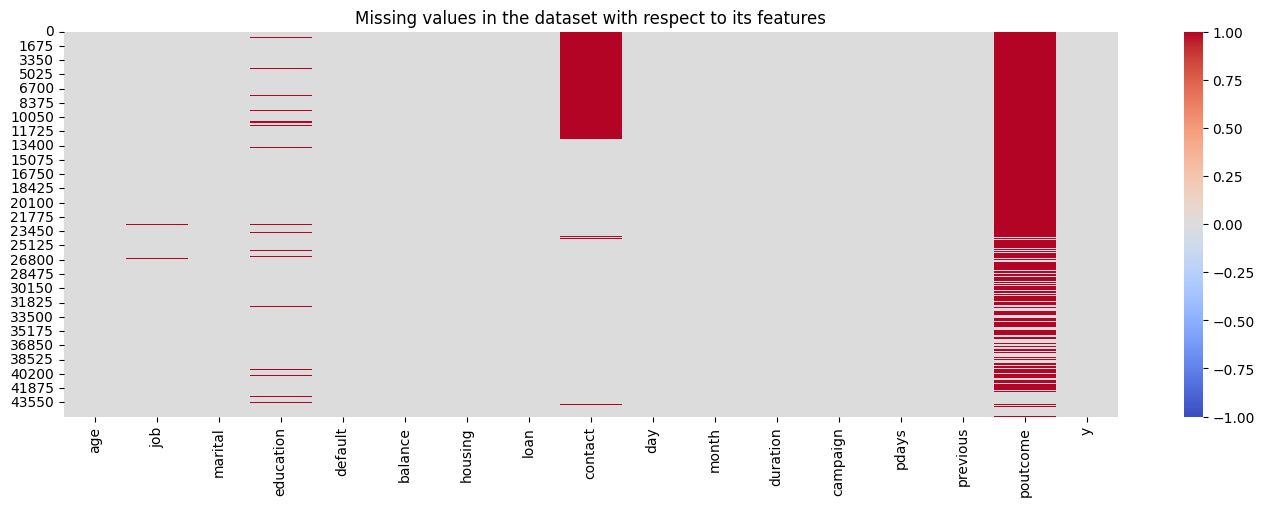

In [22]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [23]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [24]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [25]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [26]:
# Nullfree shape of dataset
df.shape

(45211, 16)

- Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.

.

#### ***[3] <u>Handling Outliers</u>***

__________________________________________________________________________________________


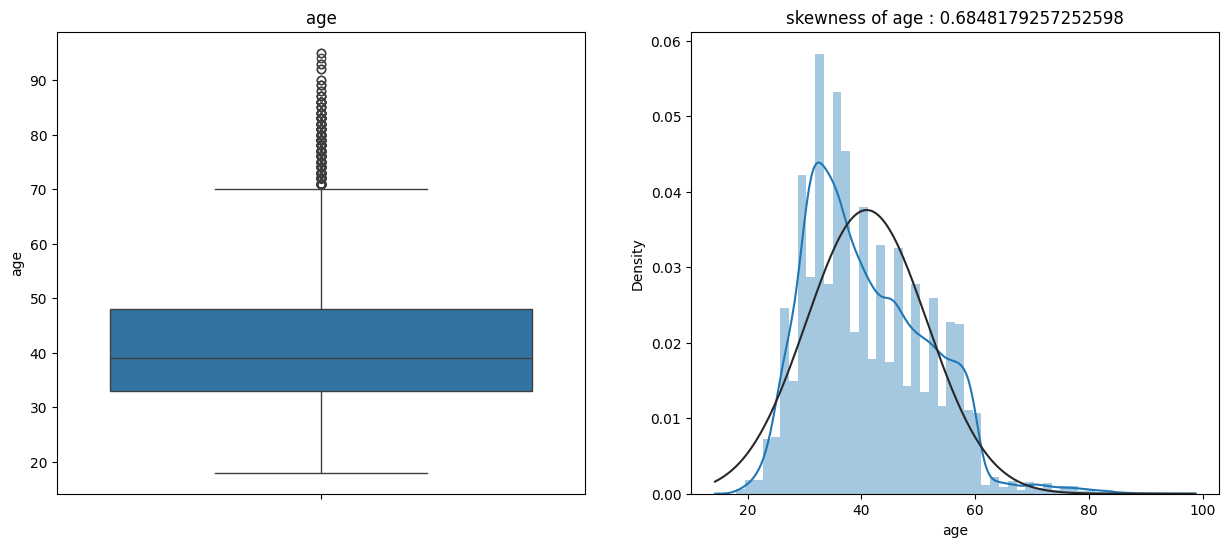

__________________________________________________________________________________________


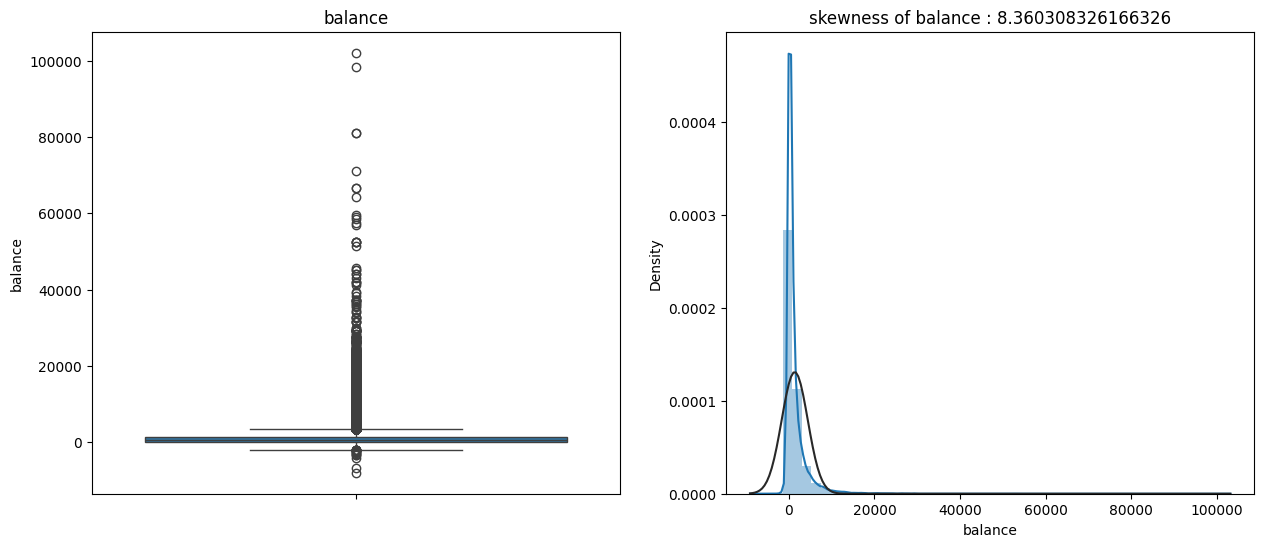

__________________________________________________________________________________________


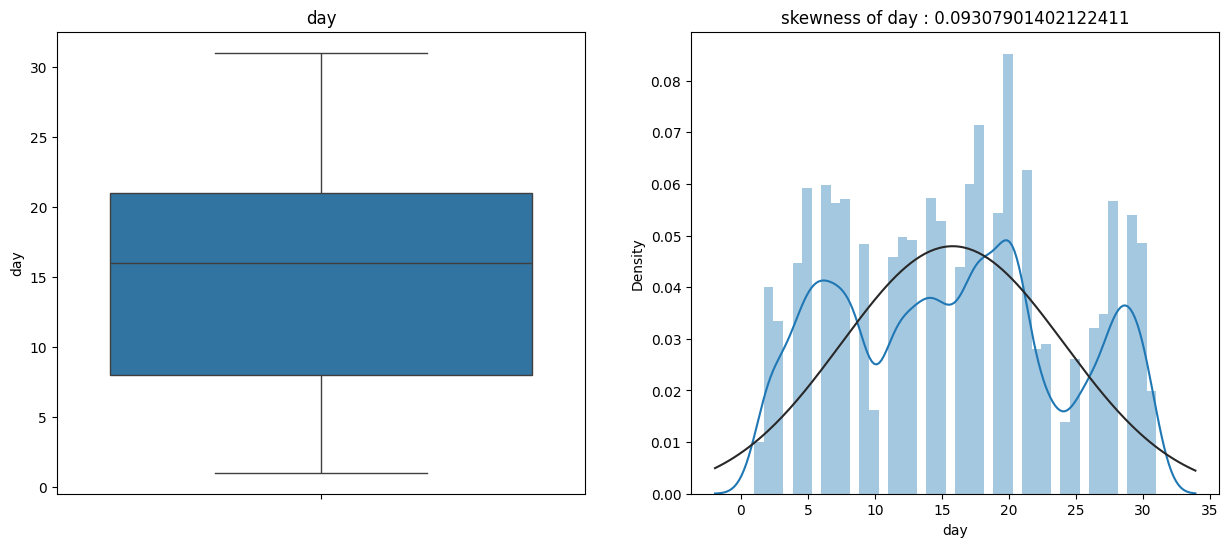

__________________________________________________________________________________________


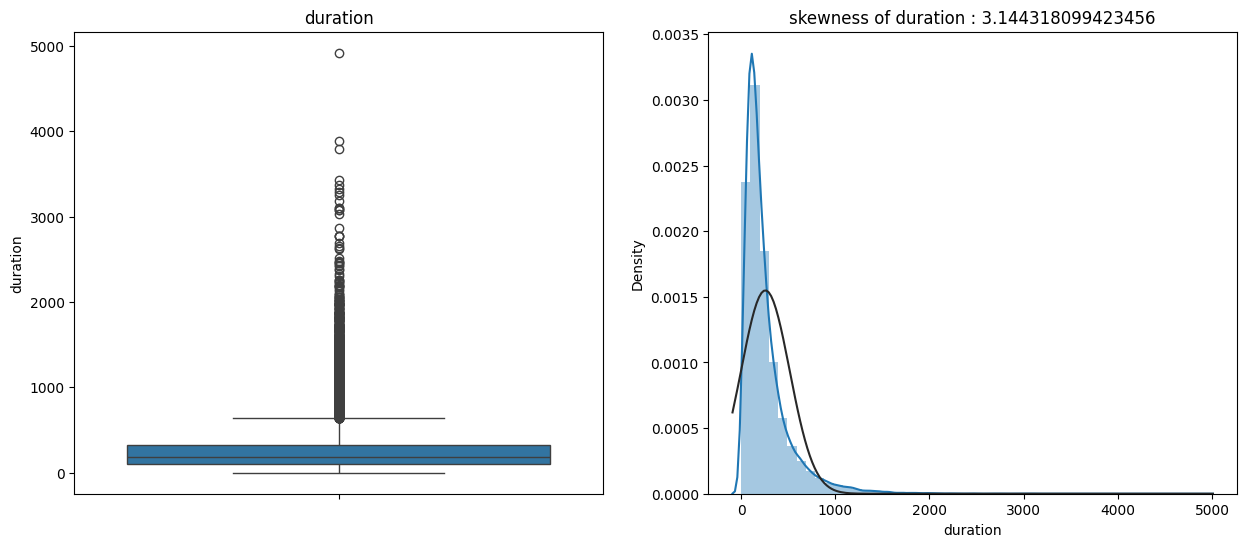

__________________________________________________________________________________________


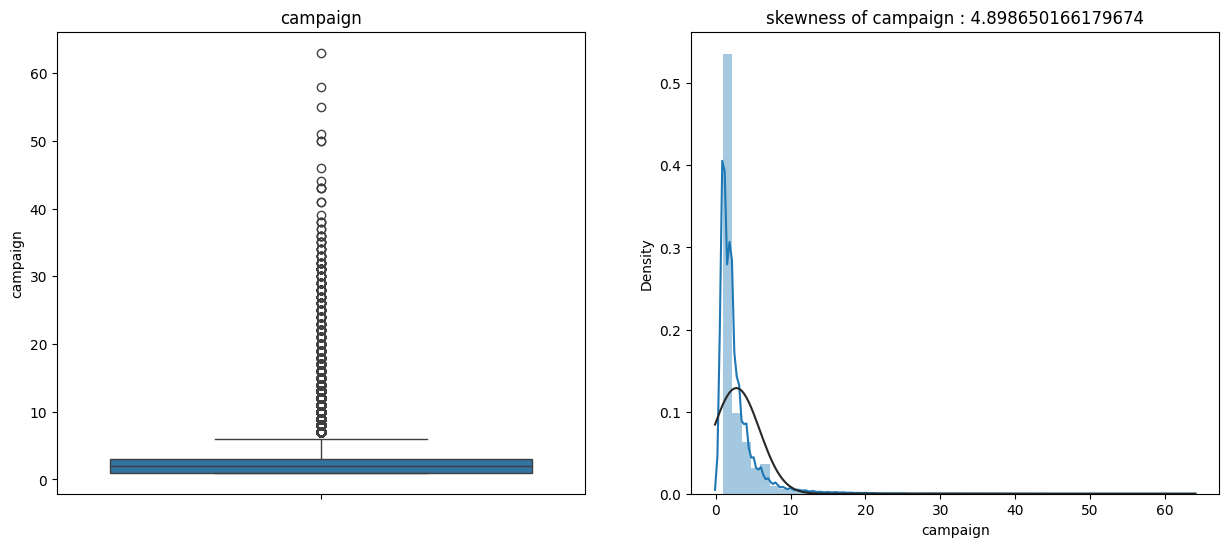

__________________________________________________________________________________________


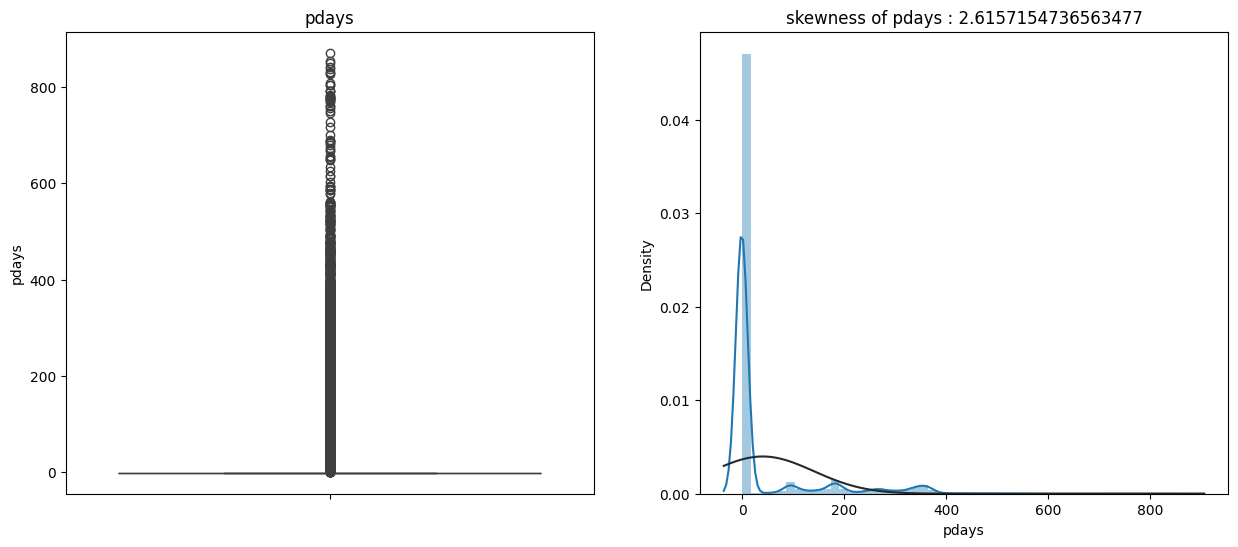

__________________________________________________________________________________________


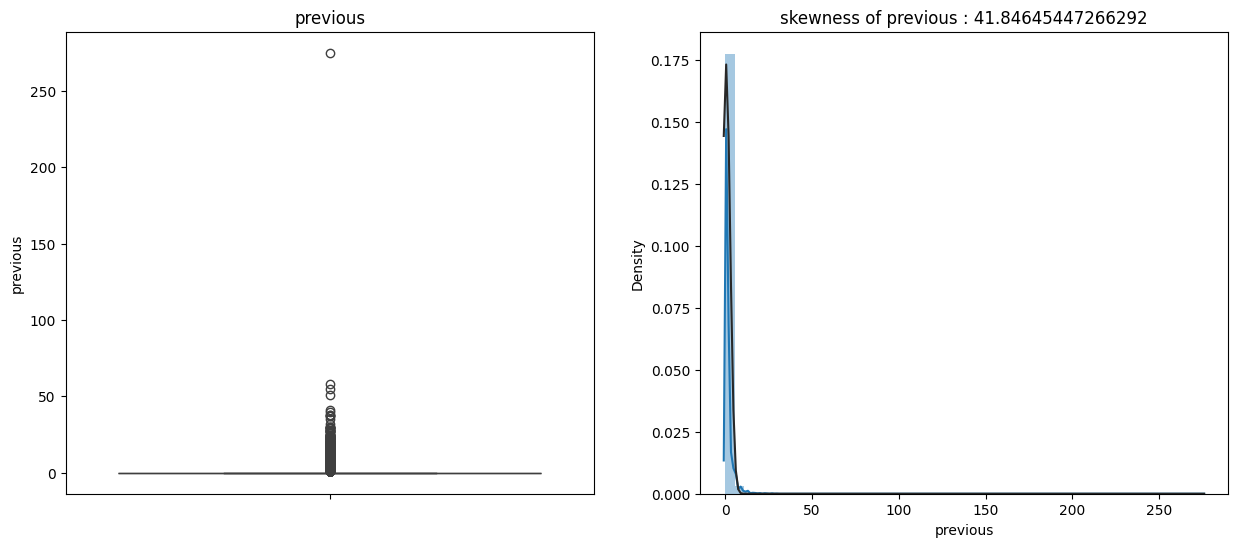

In [27]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [28]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


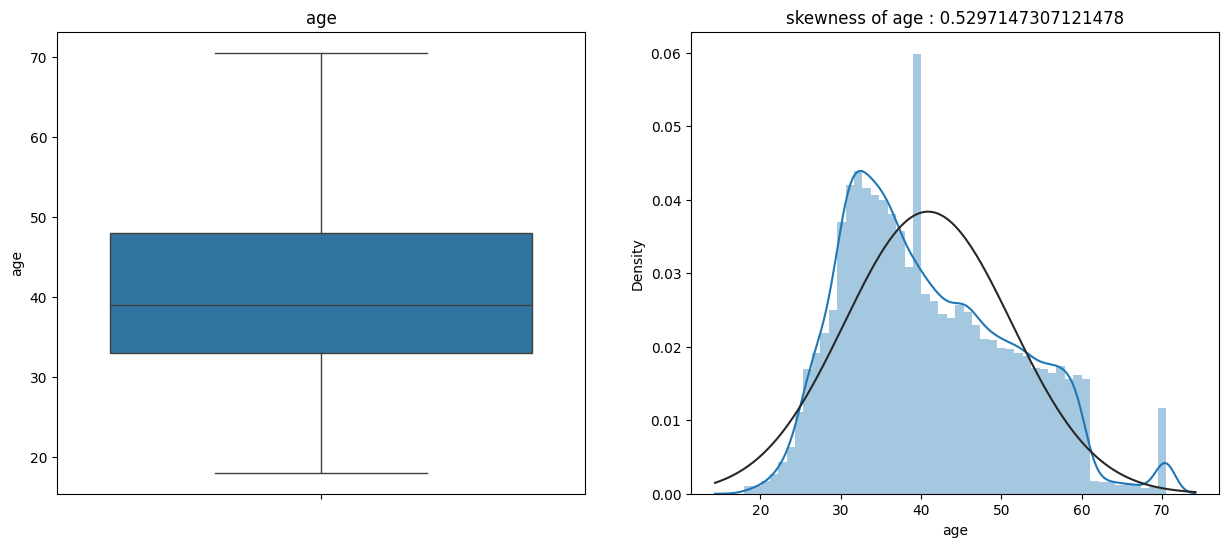

__________________________________________________________________________________________


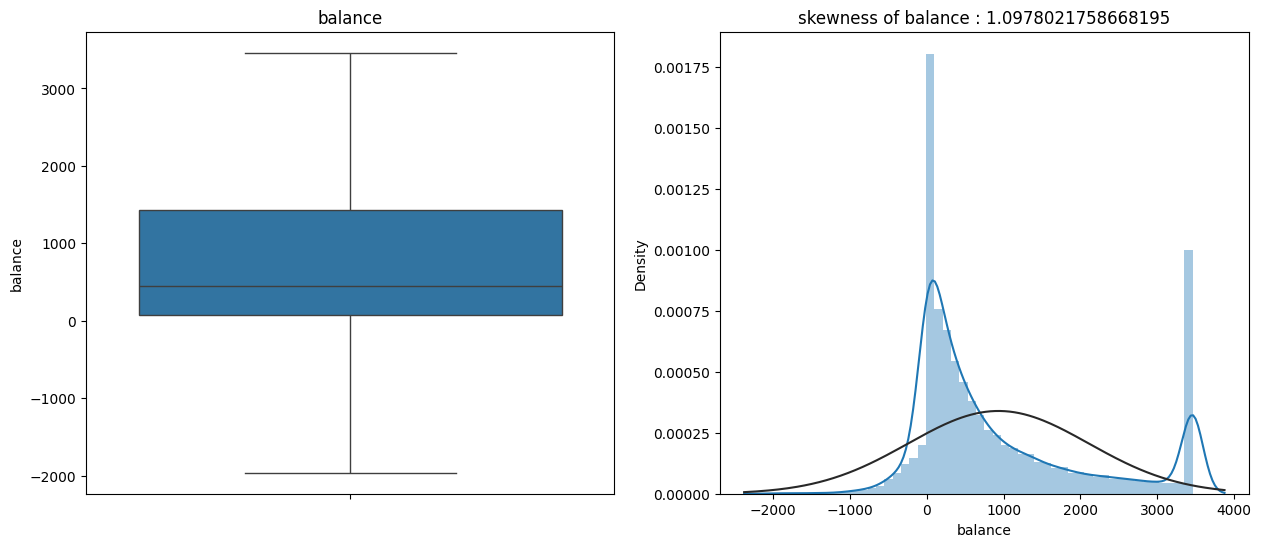

__________________________________________________________________________________________


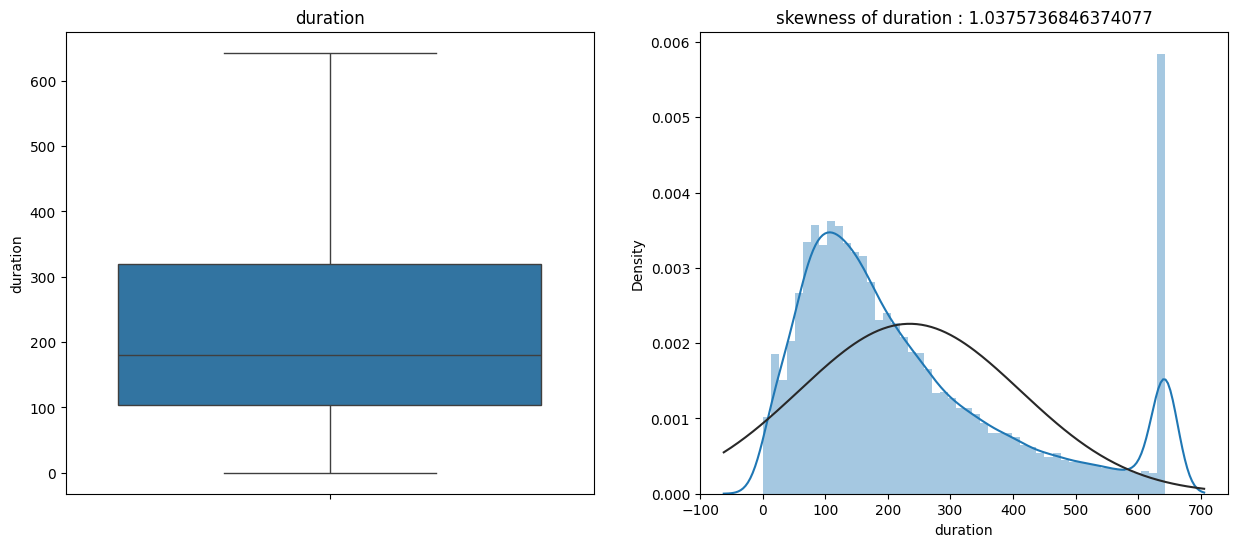

__________________________________________________________________________________________


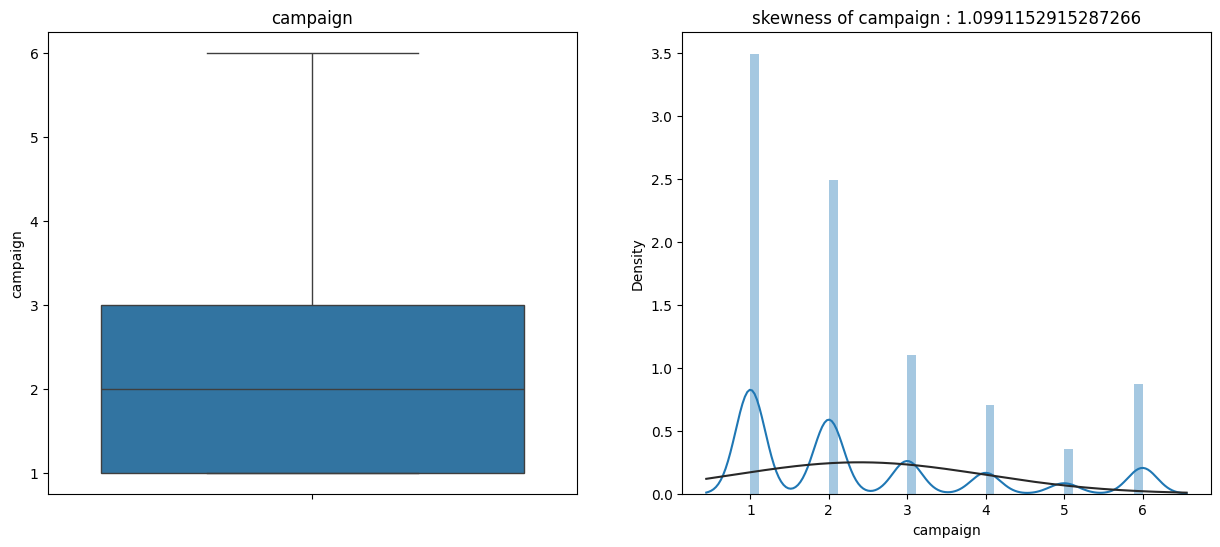

In [29]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- Outliers are successfully removed from the dataset.

**<u>Observations :</u>**
- This dataset contains no values that are duplicates.
- Job, education, contacts, and poutcome each have unknown values of 288; 1857; 13020; and 36959. Since unknown values are not defined and can be removed from features by treatment, they can be handled as null.
- Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.
- Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
- Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous. It is better to eliminate the columns pdays and previous because they have an interquartile range which is flat.
- No outliers exist on a variable day.

.

## **<u>Exploratory data analysis</u>**

#### **<u>[1] Univariate Analysis</u>**

In [30]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [31]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

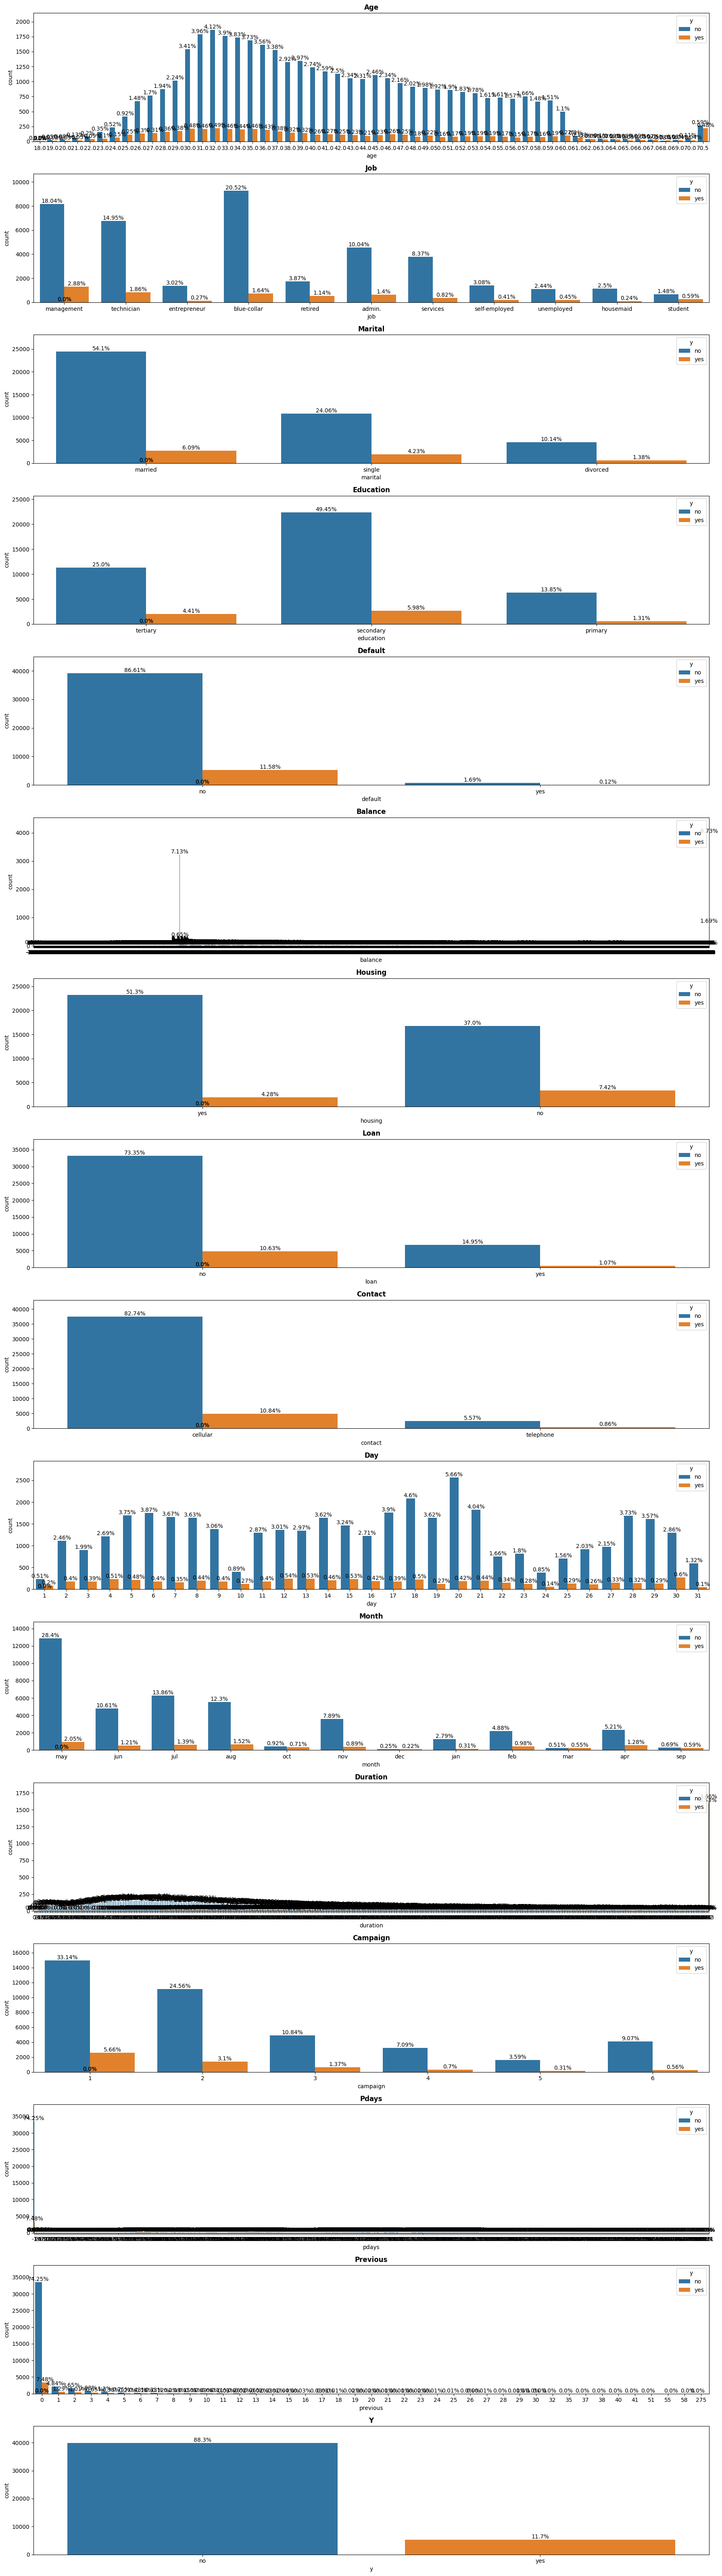

In [32]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*4))
for n,var in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[var], hue=df['y']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

##### Age:

- The average client falls between 25 and 60 years old.

##### Job:

- Clients with managerial positions have a higher subscription rate for term deposits compared to those with other jobs.

##### Education:

- Clients with a higher education level (above primary) are more likely to subscribe to term deposits.

##### Credit Default:

- Clients with no history of credit default are more likely to subscribe to term deposits.

##### Housing Loan:

- Clients without a housing loan show a higher subscription rate for term deposits.

##### Personal Loan:

- Similar to marital status, there seems to be a contradiction regarding personal loans. 
- The observation mentions both a higher subscription rate for clients without personal loans and an increased chance of not subscribing if they have one. 

##### Contact Method:

- Clients contacted via cell phone have a higher subscription rate for term deposits.

##### Subscription Rate:

- Daily subscription rate is generally below 1%, except for May, which has a rate more than double other months.

##### Phone Calls:

- No subscriptions were recorded for clients who received more than three phone calls. 
- Clients contacted less than three times show a higher subscription rate.

##### Overall Subscription Rate:

- Only 11.7% of total clients subscribe to term deposits.


.

#### **<u>[2] Bivariate Analysis<u>**

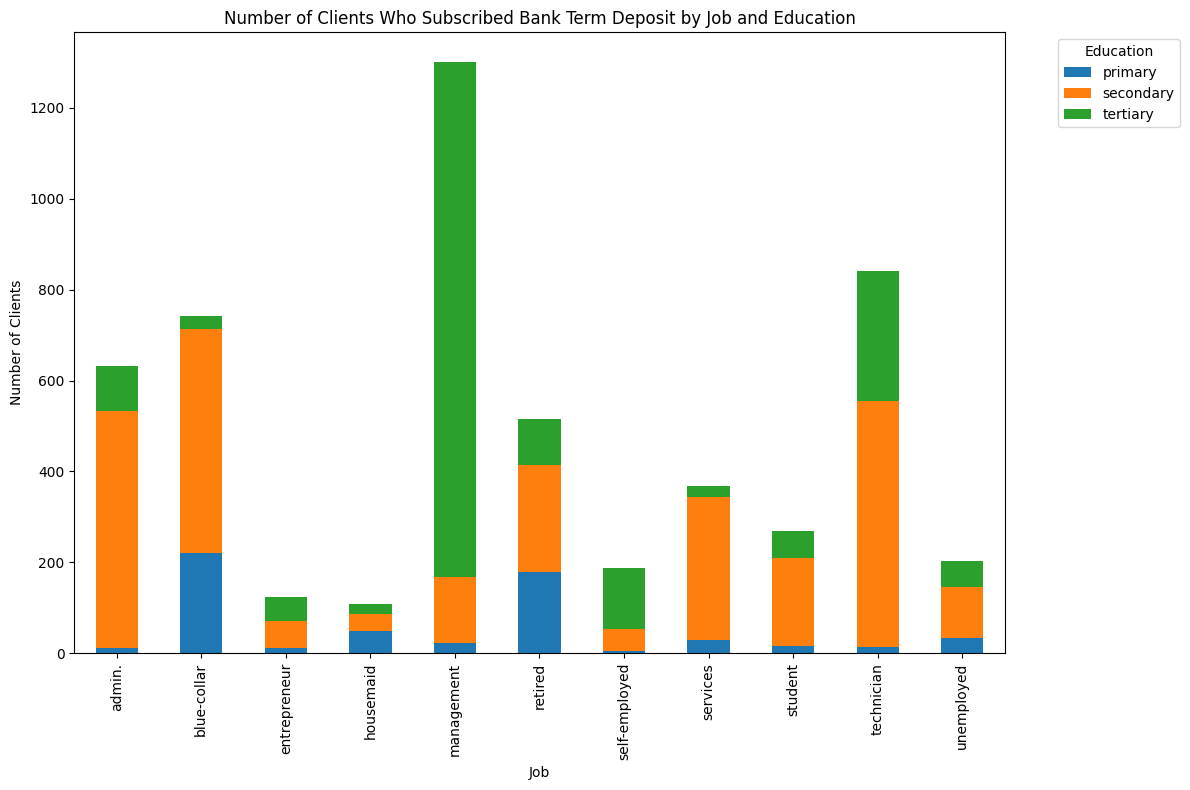

In [33]:
subscribed_df = df[df.y == 'yes']
subscribed_df2 = subscribed_df.groupby(['job', 'education'])['y'].count().unstack().fillna(0)

ax = subscribed_df2.plot(kind="bar", stacked=True, figsize=(12, 8))

ax.set_title('Number of Clients Who Subscribed Bank Term Deposit by Job and Education')
ax.set_xlabel('Job')
ax.set_ylabel('Number of Clients')

colors = plt.cm.tab20(np.linspace(0, 1, len(subscribed_df2.columns)))
ax.set_prop_cycle('color', colors)

ax.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**<u>Observations :</u>**
- Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.
- Customers with a secondary education are the second most likely to subscribe to term deposits.

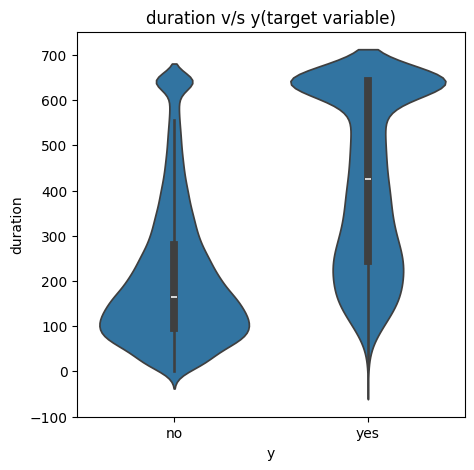

In [34]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

**<u>Observations :</u>**
- Clients are more likely to subscribe to term deposits if they spend more time on the phone.

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

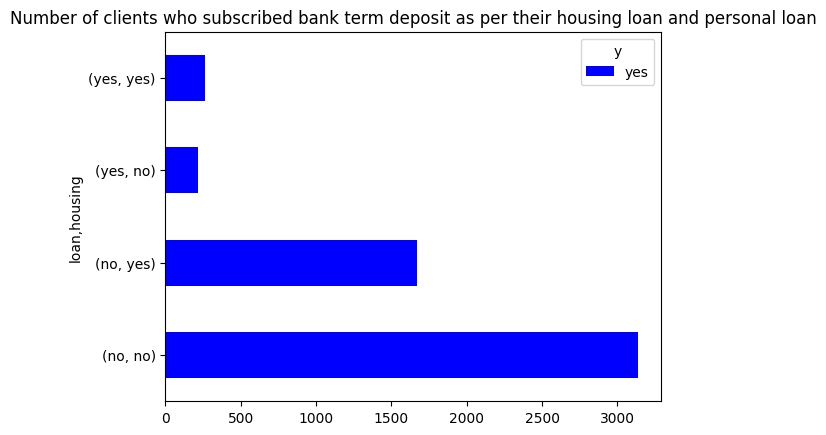

In [35]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df.y=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan', color="blue")

**<u>Observations :</u>**
- A customer is more likely to sign up for a term deposit if he is entirely debt-free.
- Customers are less likely to choose a term deposit if they already have both types of loans.

.

#### **<u>[3] Multivariate Analysis<u>**

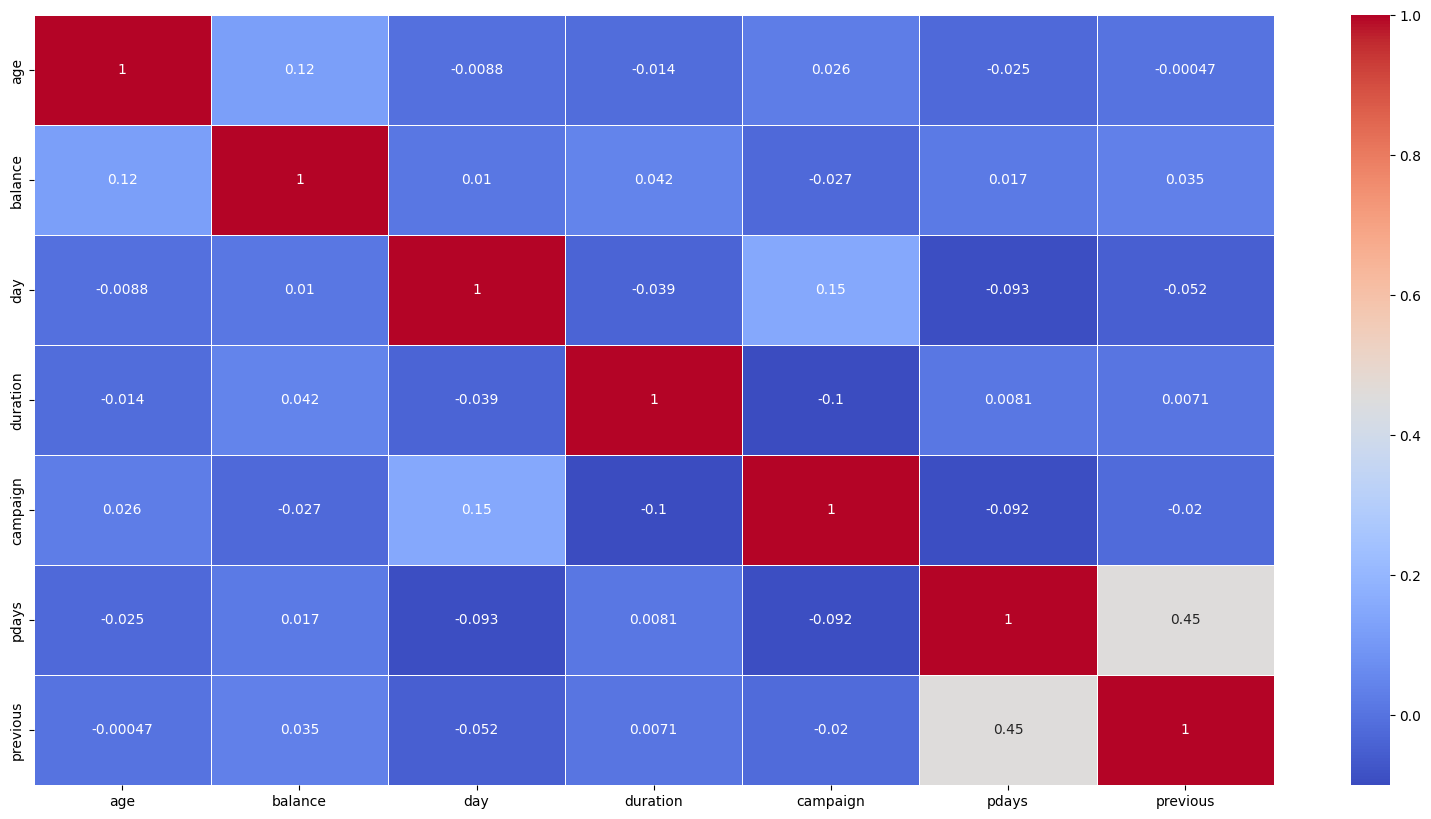

In [36]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
selected_df = df[selected_columns]

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(selected_df.corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**<u>Observations :</u>**
- There is no correlation between any independent variables.

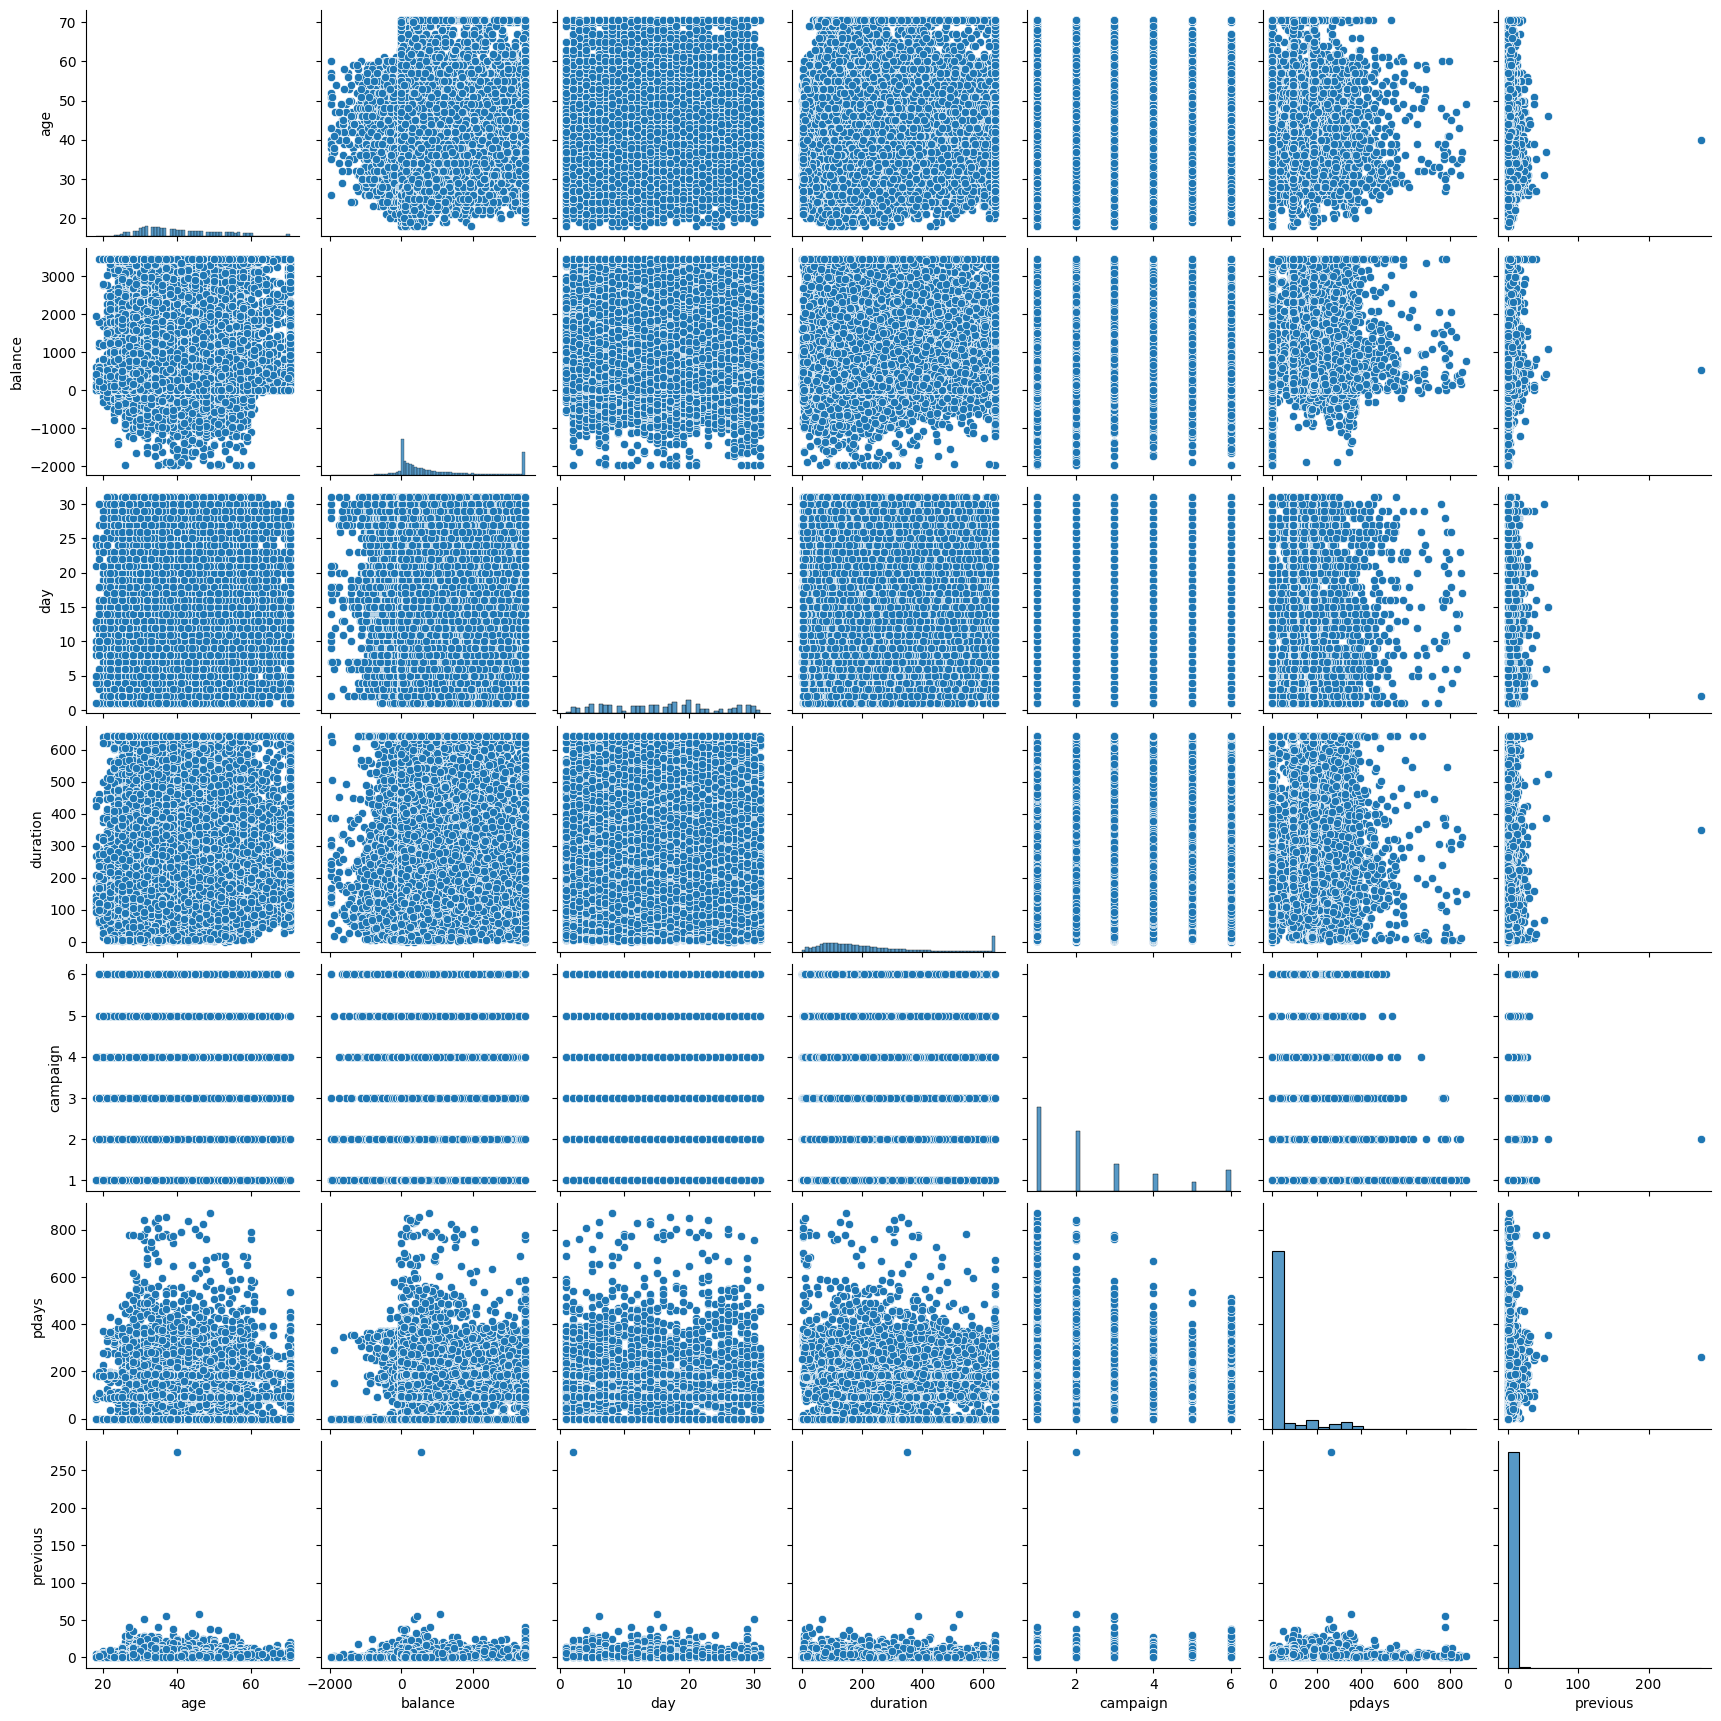

In [37]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

## **<u>Data Pre-processing</u>**

#### **<u>[1] Categorical Encoding</u>**

In [38]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [39]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [40]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
____________________________________________________

**<u>Observations :</u>**
- Label encoding can be used for categorical variables with few categories such as marital, education, default, housing, loan, contact, and y.
- One hot encoding can be used for the categorical variables job and month, as they have numerous categories.

In [41]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [42]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [43]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  bool   
 15  job_entrepreneur   45211 non-null  bool   
 16  job_housemaid      452

In [44]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head(5)

age  marital  education  default  balance  housing  loan  contact  day  \
0  58.0        1          1        0     2143        1     0        1    5   
1  44.0        0          0        0       29        1     0        1    5   
2  33.0        1          0        0        2        1     1        1    5   
3  47.0        1          0        0     1506        1     0        1    5   
4  33.0        0          0        0        1        0     0        1    5   

   duration  campaign  pdays  previous  y  job_blue-collar  job_entrepreneur  \
0       261         1     -1         0  0            False             False   
1       151         1     -1         0  0            False             False   
2        76         1     -1         0  0            False              True   
3        92         1     -1         0  0             True             False   
4       198         1     -1         0  0             True             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False            True        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  month_aug  \
0         False        False           False           False      False   
1         False        False            True           False      False   
2         False        False           False           False      False   
3         False        False           False           False      False   
4         False        False           False           False      False   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_may  month_nov  month_oct  month_sep  
0       True      False      False      False  
1       True      False      False      False  
2       True      False      False      False  
3       True      False      False      False  
4       True      False      False      False

In [45]:
#encoding for False and True column
for column in df.columns[14:]: 
    df[column] = df[column].map({True:1,False:0})

In [46]:
df.head(5)

age  marital  education  default  balance  housing  loan  contact  day  \
0  58.0        1          1        0     2143        1     0        1    5   
1  44.0        0          0        0       29        1     0        1    5   
2  33.0        1          0        0        2        1     1        1    5   
3  47.0        1          0        0     1506        1     0        1    5   
4  33.0        0          0        0        1        0     0        1    5   

   duration  campaign  pdays  previous  y  job_blue-collar  job_entrepreneur  \
0       261         1     -1         0  0                0                 0   
1       151         1     -1         0  0                0                 0   
2        76         1     -1         0  0                0                 1   
3        92         1     -1         0  0                1                 0   
4       198         1     -1         0  0                1                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              0               1            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  month_aug  \
0             0            0               0               0          0   
1             0            0               1               0          0   
2             0            0               0               0          0   
3             0            0               0               0          0   
4             0            0               0               0          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_may  month_nov  month_oct  month_sep  
0          1          0          0          0  
1          1          0          0          0  
2          1          0          0          0  
3          1          0          0          0  
4          1          0          0          0

#### **<u>[2] Separating Dependant and Independant variables</u>**

In [47]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})


# Create the data of independent variables
X = df[independent_variables].copy()


# Create the data of dependent variable
y = df[dependent_variable].copy()

In [48]:
X.isna().sum()

job_entrepreneur     0
housing              0
month_oct            0
month_feb            0
education            0
contact              0
pdays                0
job_self-employed    0
month_nov            0
job_management       0
job_retired          0
campaign             0
month_jan            0
marital              0
month_sep            0
job_unemployed       0
job_technician       0
age                  0
job_student          0
loan                 0
month_aug            0
duration             0
month_dec            0
month_mar            0
default              0
job_housemaid        0
job_blue-collar      0
month_jun            0
previous             0
month_may            0
job_services         0
month_jul            0
balance              0
day                  0
dtype: int64

#### **<u>[3] Feature Manipulation & Selection</u>**

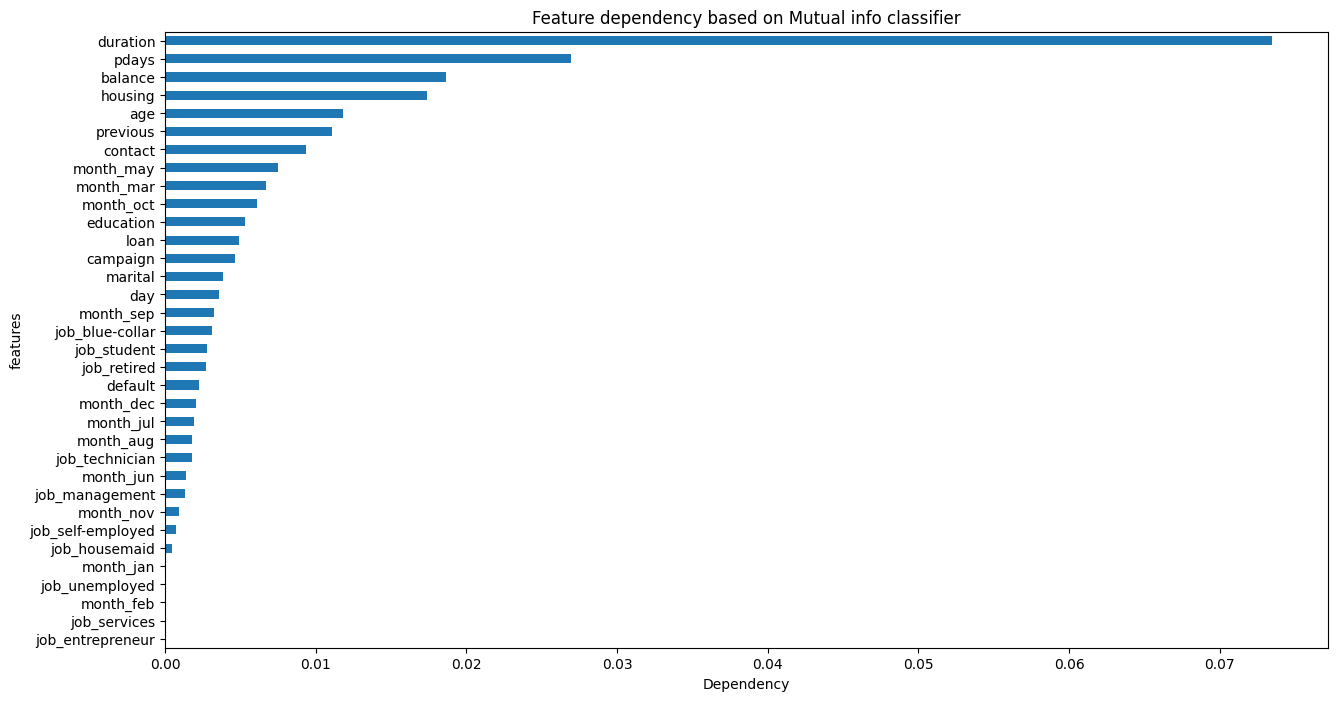

In [49]:
# Plotting feature dependency for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
dependency = mutual_info_classif(X,y)
feature_importances = pd.Series(dependency, index = independent_variables).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature dependency based on Mutual info classifier")
plt.xlabel('Dependency')
plt.ylabel('features')
plt.show()

**<u>Observations :</u>**
- Important features are listed in descending order of their dependency and can be removed if they are no longer dependent, but all the features that we have included have significant importance, so we are keeping all of them.

.

#### **<u>[4] Handling Imbalanced Dataset</u>**

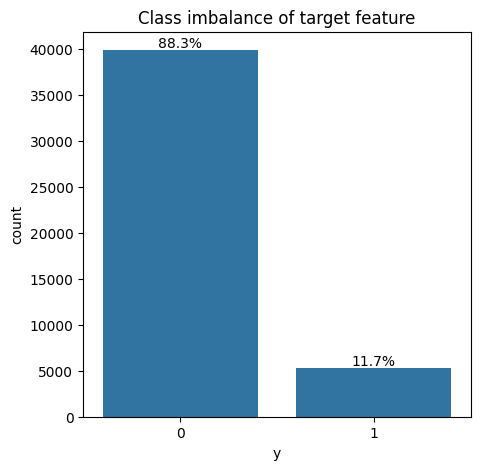

In [50]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

- We clearly detect a class imbalance beacause discovered that the number of clients who subscribed to term deposits is 11.7% lower than the number of clients who did not (88.3%).

In [51]:
# Import model imblearn in envirnoment
!pip install imblearn

In [52]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 0)


#fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)
#x_smote, y_smote = smote.fit(X, y) 

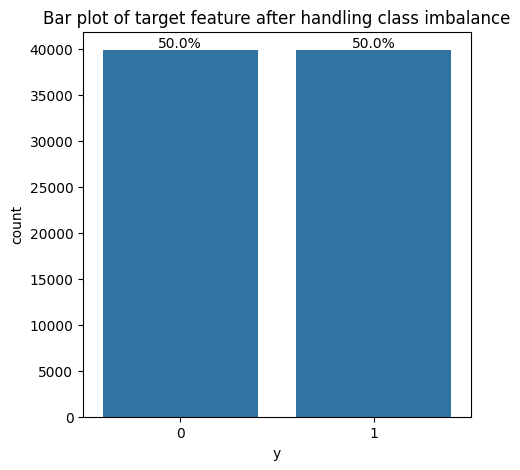

In [53]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

- Class imbalance handled successfully using the Synthetic Minority Oversampling Technique (SMOTE).

#### **<u>[5] Data Splitting</u>**

In [54]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [55]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


- We divided the dataset into 20% for model testing and 80% for training.

In [56]:
# Checking values of splitted dataset
X_train[0:3]

job_entrepreneur  housing  month_oct  month_feb  education  contact  \
76180                 0        0          0          1          1        1   
36038                 0        1          0          0          1        1   
41791                 0        0          1          0          1        1   

       pdays  job_self-employed  month_nov  job_management  job_retired  \
76180     86                  0          0               0            0   
36038     -1                  0          0               0            1   
41791     -1                  0          0               1            0   

       campaign  month_jan  marital  month_sep  job_unemployed  \
76180         1          0        1          0               0   
36038         1          0        1          0               0   
41791         3          0        1          0               0   

       job_technician        age  job_student  loan  month_aug  duration  \
76180               0  70.028256            0     0          0       310   
36038               0  50.000000            0     1          0        67   
41791               0  62.000000            0     0          0        78   

       month_dec  month_mar  default  job_housemaid  job_blue-collar  \
76180          0          0        0              0                0   
36038          0          0        0              0                0   
41791          0          0        0              0                0   

       month_jun  previous  month_may  job_services  month_jul  balance  day  
76180          0         3          0             0          0     3324   10  
36038          0         0          1             0          0        4   11  
41791          0         0          0             0          0        0   13

In [57]:
# Checking values of splitted dataset
X_test[0:3]

job_entrepreneur  housing  month_oct  month_feb  education  contact  \
72809                 0        0          0          0          0        1   
71061                 0        1          0          0          0        1   
57176                 0        0          0          0          0        0   

       pdays  job_self-employed  month_nov  job_management  job_retired  \
72809     -1                  0          0               0            0   
71061     -1                  0          0               0            0   
57176     -1                  0          0               0            0   

       campaign  month_jan  marital  month_sep  job_unemployed  \
72809         2          0        1          0               0   
71061         2          0        0          0               0   
57176         2          0        1          0               0   

       job_technician        age  job_student  loan  month_aug  duration  \
72809               0  39.273337            0     0          0       315   
71061               0  46.690791            0     0          0       643   
57176               0  54.030217            0     0          0       643   

       month_dec  month_mar  default  job_housemaid  job_blue-collar  \
72809          0          0        0              0                0   
71061          0          0        0              0                0   
57176          0          0        0              0                0   

       month_jun  previous  month_may  job_services  month_jul  balance  day  
72809          0         0          0             0          0     3462   17  
71061          0         0          0             0          0     1100   22  
57176          0         0          0             0          0        0    4

.

#### **<u>[6] Data Scaling</u>**

In [58]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [59]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.        , 0.        , 1.        , 0.5       ,
        1.        , 0.09977064, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.9910144 , 0.        , 0.        ,
        0.        , 0.48211509, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05263158, 0.        ,
        0.        , 0.        , 0.97455752, 0.3       ],
       [0.        , 1.        , 0.        , 0.        , 0.5       ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.60952381, 0.        , 1.        ,
        0.        , 0.10419907, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.36246313, 0.33333333],
       [0.        , 0.        , 1.        , 0.        , 0.5       ,
  

In [60]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.40520641, 0.        , 0.        ,
        0.        , 0.48989114, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.53333333],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.54649125, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.56452802, 0.7       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

.

## **<u>ML Model Implementation</u>**

In [61]:
import time 

# Defining function which fit classification algoritham, evaluate and visualise model using train test split

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    
    ## Fit the model using training dataset
    start = time.time()
    model=clf.fit(X_train, y_train)
    end = time.time()
    print(model)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    runtime = end - start
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print("runtime: ", runtime)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [107]:
# Defining function which fit classification algoritham using GridSearchCV, evaluate and visualise model

# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    start = time.time()
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    end = time.time()
    print(model)
    print('=='*45)
    
    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)
    
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    runtime1=end - start 
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print("runtime: ", runtime1)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)
    
    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)
    
    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test, 
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test, 'runtime': runtime1 }

In [76]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC) 
    roc_auc = auc(fpr, tpr) 
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

.

### **[1] Logistic Regression**

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29530  2484]
 [ 2972 28889]]
Accuracy:  0.9145831702544032
Precision:  0.9208236381602014
Recall:  0.9067198141929004
F1 Score:  0.913717303982035
roc_auc_score:  0.9145643801394939
runtime:  0.14725112915039062

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7257  651]
 [ 766 7295]]
Accuracy:  0.9112655770555451
Precision:  0.9180719859048578
Recall:  0.9049745689120456
F1 Score:  0.911476229149747
roc_auc_score:  0.9113264346836405


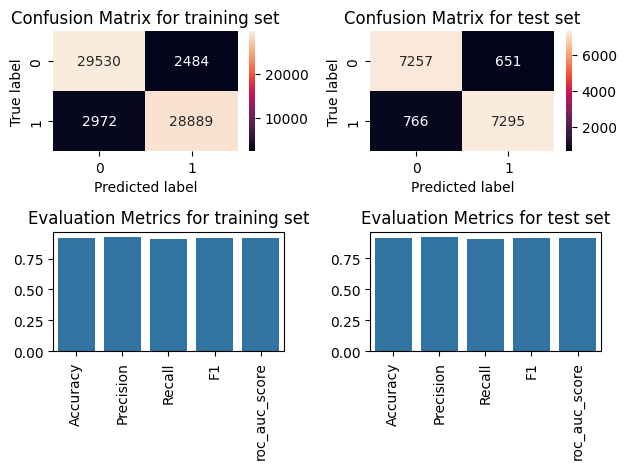

In [108]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

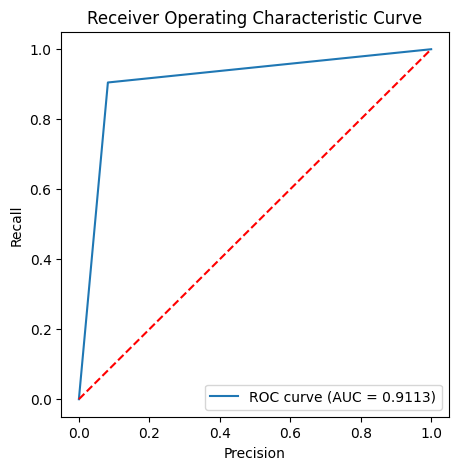

In [109]:
# Plot roc curve for Logistic Regression classifier
y_pred=lr['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 10}
Best score: 0.9144892747393345
Training set evaluation result :

Confusion Matrix: 
 [[29527  2487]
 [ 2975 28886]]
Accuracy:  0.9144892367906067
Precision:  0.920728014534791
Recall:  0.9066256551897304
F1 Score:  0.9136224183192586
roc_auc_score:  0.9144704461367531
runtime:  0.8964860439300537

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7249  659]
 [ 769 7292]]
Accuracy:  0.9105767424384745
Precision:  0.9171173437303484
Recall:  0.9046024066492991
F1 Score:  0.9108168873344992
roc_auc_score:  0.9106345366579829


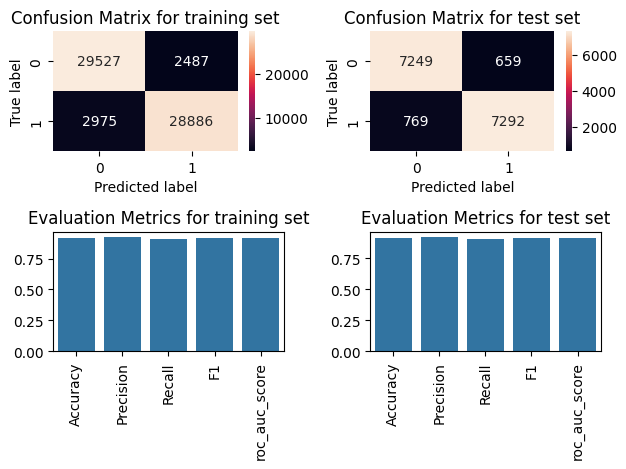

In [112]:
## Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression

## Fitting Logistic Regression model to training set using cross validation

# Defined param_dict
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train, X_test, y_train, y_test, Logistic_regression, param_grid)

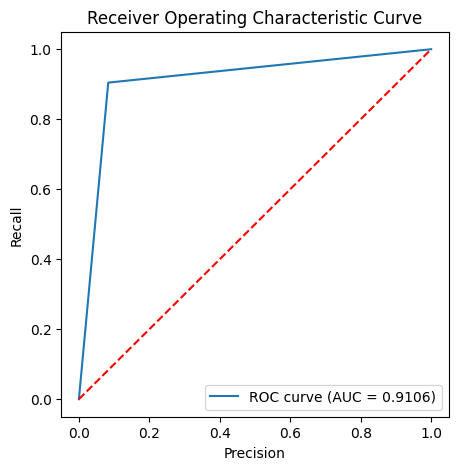

In [113]:
# Plot roc curve for Logistic Regression for cross validation
y_pred=lr_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.911266 |           0.910577 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.918072 |           0.917117 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.904975 |           0.904602 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.911476 |           0.910817 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.911326 |           0.910635 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

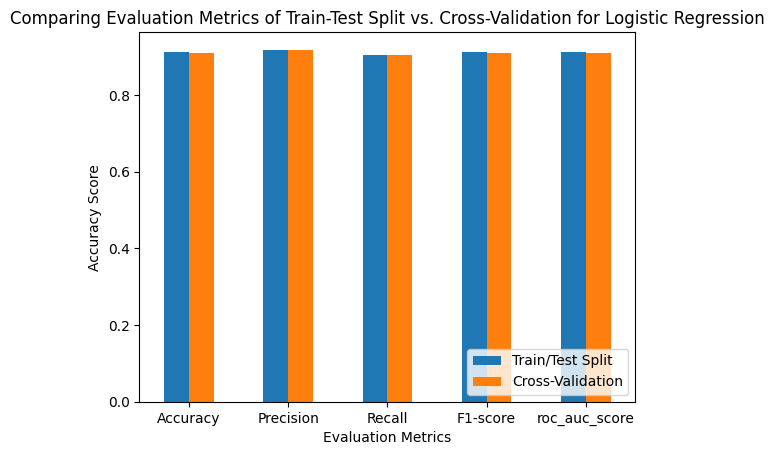

In [114]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Logistic Regression model

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [lr['accuracy_test'],lr['precision_test'],lr['recall_test'],lr['f1_test'],lr['roc_auc_score_test']]
cross_validation = [lr_cv['accuracy_test'],lr_cv['precision_test'],lr_cv['recall_test'],lr_cv['f1_test'],lr_cv['roc_auc_score_test']]

# Create a dataframe
lr_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(lr_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=lr_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Logistic Regression")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We saw no improvement in the model after training with cross-validation.
- We got 0.905099 of recall in logistics regression model.

.

### **[2] Random Forest**

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[28242  3772]
 [ 4179 27682]]
Accuracy:  0.8755225048923679
Precision:  0.8800788452978954
Recall:  0.8688365085841625
F1 Score:  0.8744215430782595
roc_auc_score:  0.8755065281722586
runtime:  1.6140389442443848

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6955  953]
 [1080 6981]]
Accuracy:  0.872690838499593
Precision:  0.879884043357701
Recall:  0.8660215854112393
F1 Score:  0.8728977805564239
roc_auc_score:  0.8727553551740062


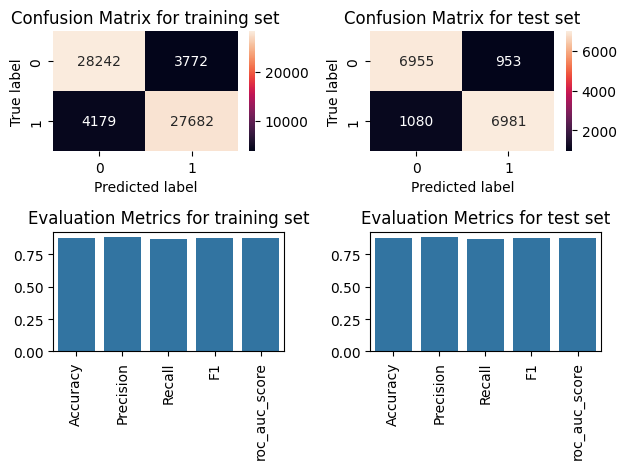

In [71]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest model to training set
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rf=classification_model(X_train, X_test, y_train, y_test, classifier_rf)

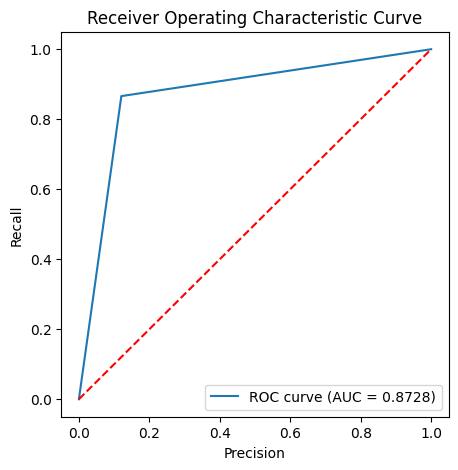

In [79]:
# Plot ROC curve for Random Forest classifier
y_pred=rf['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 243 candidates, totalling 729 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'max_leaf_nodes': [35, 40, 45],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 8, 'max_leaf_nodes': 45, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 80}
Best score: 0.9017768832201395
Training set evaluation result :

Confusion Matrix: 
 [[28508  3506]
 [ 2798 29063]]
Accuracy:  0.901307240704501
Precision:  0.8923516227087107
Recall:  0.9121810363767615
F1 Score:  0.9021573801024367
roc_auc_score:  0.9013332245043675
runtime:  140.35718035697937

-------------------------------

Test s

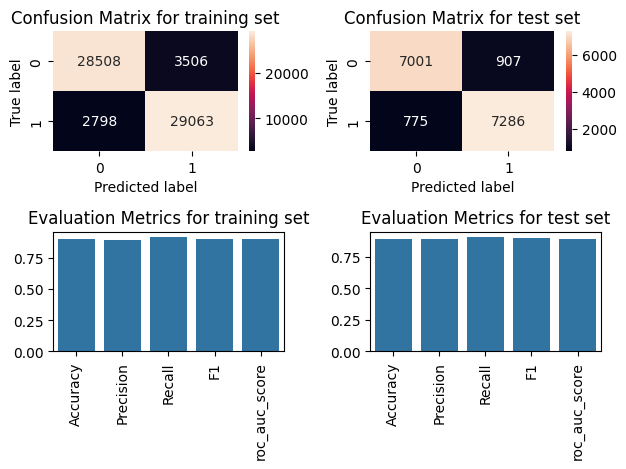

In [115]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier

## Fitting Random Forest model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50, 80, 100],
              'max_depth':[4, 6, 8],
              'min_samples_split':[30, 50, 70],
              'min_samples_leaf': [20, 30, 40], 
              'max_leaf_nodes': [ 35, 40, 45]} 
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', random_state=0) 
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

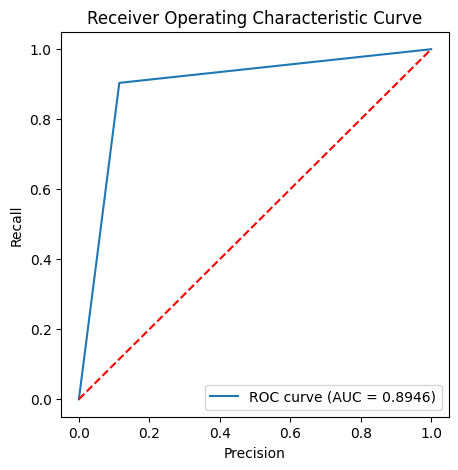

In [118]:
# Plot ROC curve for Random Forest classifier
y_pred=rf_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.872691 |           0.894671 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.879884 |           0.889296 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.866022 |           0.903858 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.872898 |           0.896518 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.872755 |           0.894582 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

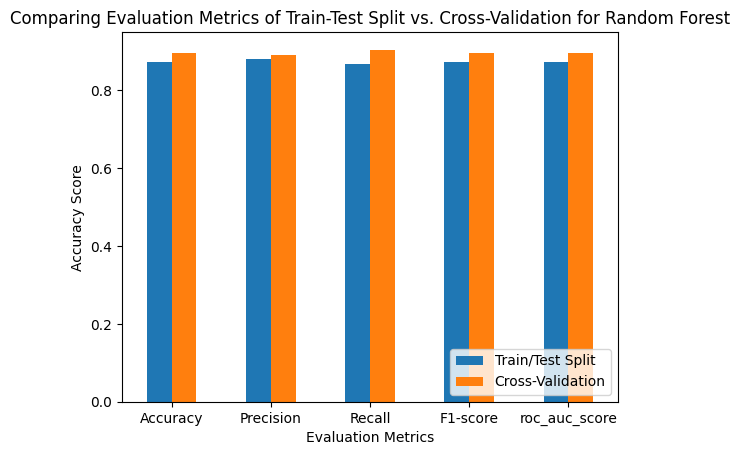

In [81]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Random Forest model

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [rf['accuracy_test'],rf['precision_test'],rf['recall_test'],rf['f1_test'],rf['roc_auc_score_test']]
cross_validation = [rf_cv['accuracy_test'],rf_cv['precision_test'],rf_cv['recall_test'],rf_cv['f1_test'],rf_cv['roc_auc_score_test']]

# Create a dataframe
rf_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(rf_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=rf_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Random Forest")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We saw slightly improvement in the model after training with cross-validation.
- Major improvement seen in Recall.
- We got 0.84% of Recall using train_test_split and 0.90% of Recall using cross-validation in Random Forest model.

.

### **[3] XGBoost**

GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29189  2825]
 [ 2122 29739]]
Accuracy:  0.9225518590998043
Precision:  0.913247758260656
Recall:  0.933398198424406
F1 Score:  0.9232130384167637
roc_auc_score:  0.9225777772905437
runtime:  6.203842401504517

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7173  735]
 [ 573 7488]]
Accuracy:  0.9180913018974263
Precision:  0.9106165632980664
Recall:  0.9289170078154075
F1 Score:  0.9196757553426677
roc_auc_score:  0.9179865767453367


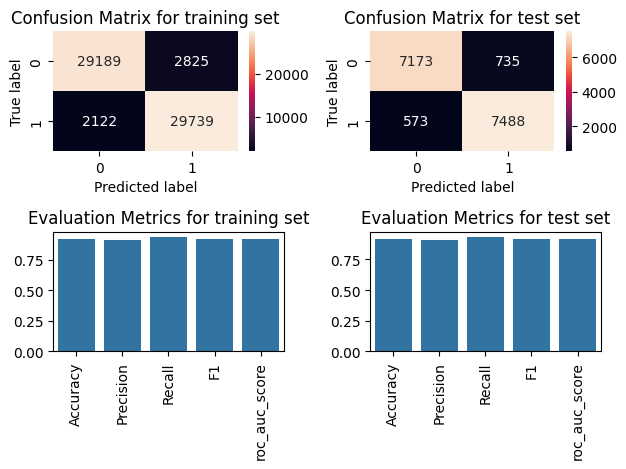

In [82]:
# Import XGBoost algoritham in envirnoment
from xgboost import XGBClassifier
# Fitting XGBoost model to training set
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
xgb=classification_model(X_train, X_test, y_train, y_test, classifier_gbm)

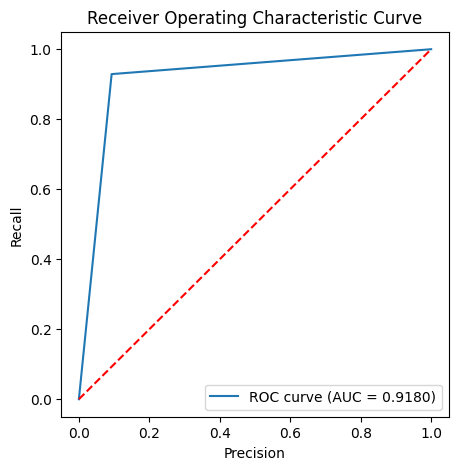

In [83]:
# Plot ROC curve for XGBoost classifier
y_pred=xgb['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 162 candidates, totalling 486 fits
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaf_nodes=10, max_leaves=None,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
           

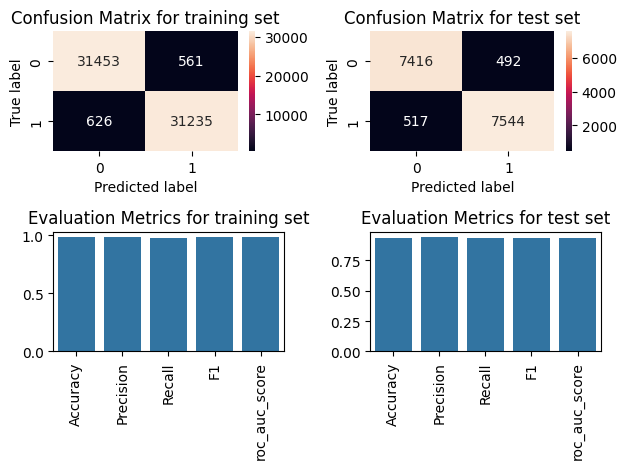

In [116]:
# Import XGBoost algoritham in envirnoment
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50], 'eta':[0.3],
             'gamma': [0],
             'lambda': [0, 1, 2]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
# Fitting model
xgb_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_xgb, param_grid)

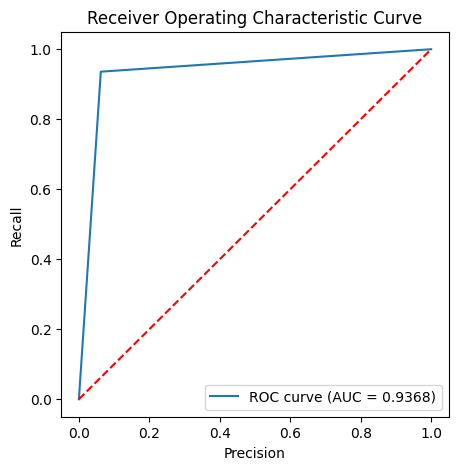

In [117]:
# Plot ROC curve for XGBoost classifier
y_pred=xgb_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.918091 |           0.936815 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.910617 |           0.938776 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.928917 |           0.935864 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.919676 |           0.937318 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.917987 |           0.936824 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

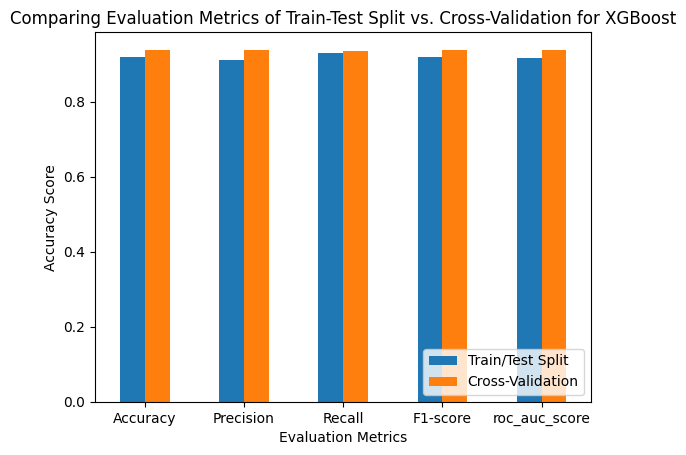

In [86]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of XGBoost model

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [xgb['accuracy_test'],xgb['precision_test'],xgb['recall_test'],xgb['f1_test'],xgb['roc_auc_score_test']]
cross_validation = [xgb_cv['accuracy_test'],xgb_cv['precision_test'],xgb_cv['recall_test'],xgb_cv['f1_test'],xgb_cv['roc_auc_score_test']]

# Create a dataframe
xgb_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(xgb_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=xgb_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for XGBoost")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We found improvement in the model after training model using cross-validation.
- More Accuracy seen in model trained using cross-validation.
- We got 0.92 % of Recall using train_test_split and 0.93 % of Recall using cross validation in XGBoost model.
- Major improvement found in Precision which is 0.91 from 0.93

.

### **[4] K-Nearest Neighbor(KNN)**

KNeighborsClassifier()
Training set evaluation result :

Confusion Matrix: 
 [[30388  1626]
 [ 2204 29657]]
Accuracy:  0.9400391389432485
Precision:  0.9480228878304511
Recall:  0.9308245190044254
F1 Score:  0.9393449892309641
roc_auc_score:  0.9400171198757993
runtime:  0.007512331008911133

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7319  589]
 [ 765 7296]]
Accuracy:  0.9152107207714948
Precision:  0.9253012048192771
Recall:  0.9050986229996278
F1 Score:  0.9150884234290732
roc_auc_score:  0.9153085426581347


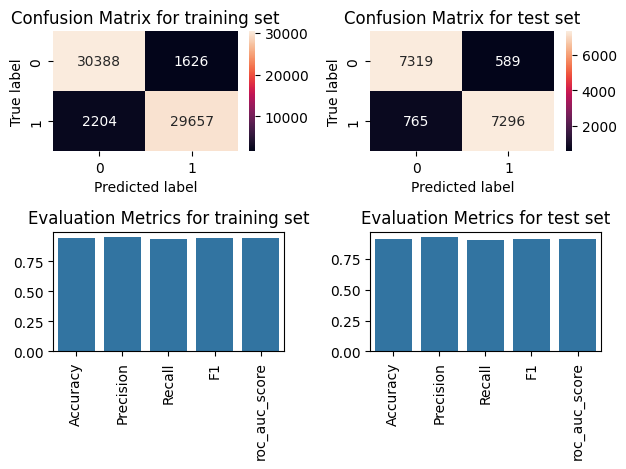

In [88]:
# Import KNN algoritham in envirnoment
from sklearn.neighbors import KNeighborsClassifier
# Fitting XGBoost model to training set
classifier_knn = KNeighborsClassifier(n_neighbors=5)
knn=classification_model(X_train, X_test, y_train, y_test, classifier_knn)

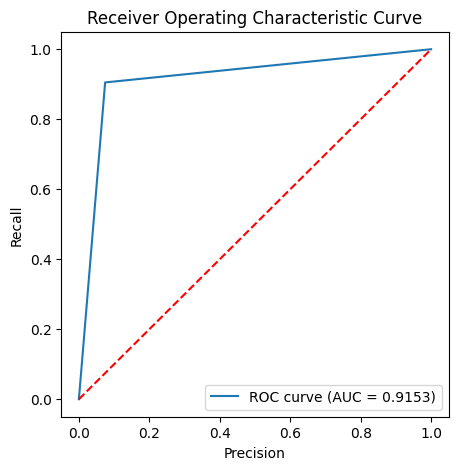

In [89]:
# Plot ROC curve for KNN classifier
y_pred=knn['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': [3, 5, 7, 9, 12, 15]},
             scoring='accuracy', verbose=1)
Best parameters: {'metric': 'cityblock', 'n_neighbors': 5}
Best score: 0.9213150628172576
Training set evaluation result :

Confusion Matrix: 
 [[30424  1590]
 [ 2018 29843]]
Accuracy:  0.9435146771037182
Precision:  0.9494162186237394
Recall:  0.9366623772009667
F1 Score:  0.9429961765728189
roc_auc_score:  0.9434983029879388
runtime:  51.50828266143799

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7337  571]
 [ 708 7353]]
Accuracy:  0.9199073204333396
Precision:  0.9279404341241797
Recall:  0.9121697059918125
F1 Score:  0.9199874882702533
roc_auc_score:  0.9199821721663666


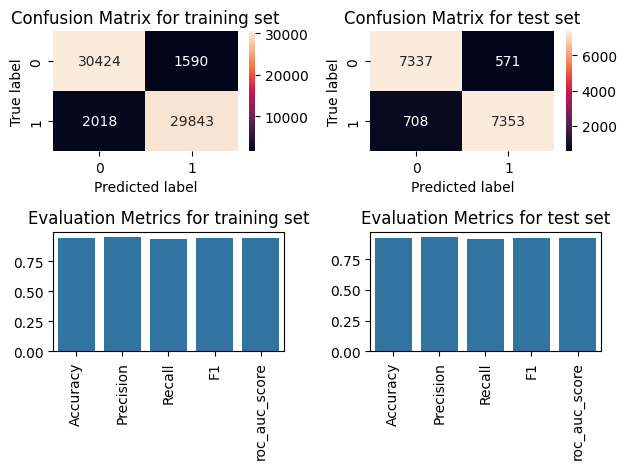

In [119]:
## Import KNN algoritham in envirnoment
from sklearn.neighbors import KNeighborsClassifier

## Fitting KNN model to training set using cross validation

# Defining param_dict
param_grid = {"n_neighbors": [3,5,7,9,12,15], "metric": ["euclidean", "cityblock"]}
# Creating instance of KNN classifier
knn_clf = KNeighborsClassifier()
# Fitting model
knn_cv=classification_CV_model(X_train, X_test, y_train, y_test, knn_clf, param_grid)

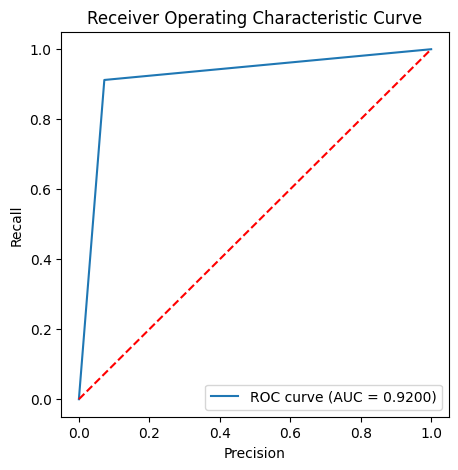

In [120]:
# Plot ROC curve for KNN classifier
y_pred=knn_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.915211 |           0.919907 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.925301 |           0.92794  |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.905099 |           0.91217  |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.915088 |           0.919987 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.915309 |           0.919982 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

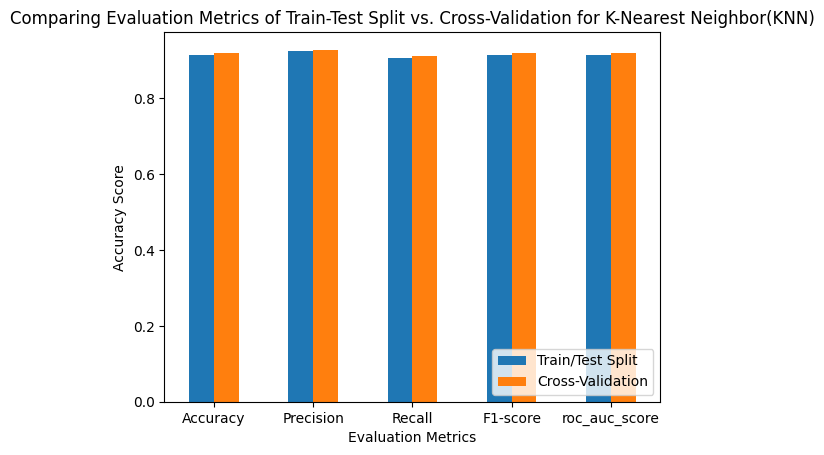

In [92]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of K-Nearest Neighbor(KNN)

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [knn['accuracy_test'],knn['precision_test'],knn['recall_test'],knn['f1_test'],knn['roc_auc_score_test']]
cross_validation = [knn_cv['accuracy_test'],knn_cv['precision_test'],knn_cv['recall_test'],knn_cv['f1_test'],knn_cv['roc_auc_score_test']]

# Create a dataframe
knn_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(knn_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=knn_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for K-Nearest Neighbor(KNN)")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

Observation <br>
-We found slightly improvement in the model after training model using cross-validation. <br>
-We got improved recall from 0.905 to 0.912 

In [124]:
## Creating dataframe of performance of all models

# Data
model=['Logistic_Regression','Random_Forest','XGBoost','K_Nearest_Neighbor']
Accuracy=[lr_cv['accuracy_test'],rf_cv['accuracy_test'],xgb_cv['accuracy_test'],knn_cv['accuracy_test']]
Precision=[lr_cv['precision_test'],rf_cv['precision_test'],xgb_cv['precision_test'],knn_cv['precision_test']]
Recall=[lr_cv['recall_test'],rf_cv['recall_test'],xgb_cv['recall_test'],knn_cv['recall_test']]
F1_score=[lr_cv['f1_test'],rf_cv['f1_test'],xgb_cv['f1_test'],knn_cv['f1_test']]
roc_auc_score=[lr_cv['roc_auc_score_test'],rf_cv['roc_auc_score_test'],xgb_cv['roc_auc_score_test'],knn_cv['roc_auc_score_test']]
confusion_matrix=[lr_cv['cm_test'],rf_cv['cm_test'],xgb_cv['cm_test'],knn_cv['cm_test']]
runtime=[lr_cv['runtime'],rf_cv['runtime'],xgb_cv['runtime'],knn_cv['runtime']]

len(Accuracy)
# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'Accuracy': Accuracy, 'Precision': Precision,
                                     'Recall':Recall, 'F1_score':F1_score,
                                     'roc_auc_score':roc_auc_score, 'confusion matrix':confusion_matrix,
                                     'run time':runtime})
# Dataframe
models_evaluation_df

model  Accuracy  Precision    Recall  F1_score  \
0  Logistic_Regression  0.910577   0.917117  0.904602  0.910817   
1        Random_Forest  0.894671   0.889296  0.903858  0.896518   
2              XGBoost  0.936815   0.938776  0.935864  0.937318   
3   K_Nearest_Neighbor  0.919907   0.927940  0.912170  0.919987   

   roc_auc_score            confusion matrix    run time  
0       0.910635  [[7249, 659], [769, 7292]]    0.896486  
1       0.894582  [[7001, 907], [775, 7286]]  140.357180  
2       0.936824  [[7416, 492], [517, 7544]]   30.229719  
3       0.919982  [[7337, 571], [708, 7353]]   51.508283

Observation <br>
Logistic Regression have the fastest runtime with 0.91 accuracy and 0.90 recall <br>
XGBoost have the highest accuracy and recall both around 0.935 with second fastest runtime <br>
Random_Forest have the worst accuracy and take too much time to run 